# 乳腺癌数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names  #恶性  良性

array(['malignant', 'benign'], dtype='<U9')

In [5]:
pd.DataFrame(data.data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [6]:
pd.concat([pd.DataFrame(data.data),pd.DataFrame(data.target)],axis=1) #用表格展示

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
from sklearn.neighbors import KNeighborsClassifier                      #knn算法
from sklearn.tree import DecisionTreeClassifier                         #决策树
from sklearn.naive_bayes import GaussianNB                              #高斯贝叶斯
from sklearn.linear_model import LogisticRegression                     #逻辑回归
from sklearn.ensemble import RandomForestClassifier                     #随机森林
from sklearn.svm import SVC                                             #支持向量机

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data.data,data.target,test_size=0.3)
print(Xtrain.shape)
print(Ytrain.shape)
X = data.data
y = data.target

(398, 30)
(398,)


## 决策树

In [15]:
#网格搜索
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

# 输出接口  最优的取值
print(GR.best_params_)
print(GR.best_score_)   #网格搜索后的模型的评判标准

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.9548101265822785


In [13]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,
                            min_samples_leaf=5,min_samples_split=5,random_state=0).fit(Xtrain,Ytrain)
decision_tree.fit(Xtrain, Ytrain)
Y_pred = decision_tree.predict(Xtest)
print(decision_tree.score(Xtrain, Ytrain))
print(decision_tree.score(Xtest, Ytest))
acc_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
cross_decision_tree = cross_val_score(decision_tree,X,y,cv=10).mean()
print(acc_decision_tree)
print(cross_decision_tree)

0.9723618090452262
0.9181286549707602
91.81
0.931484962406015


## 随机森林

0.9666353383458647 73


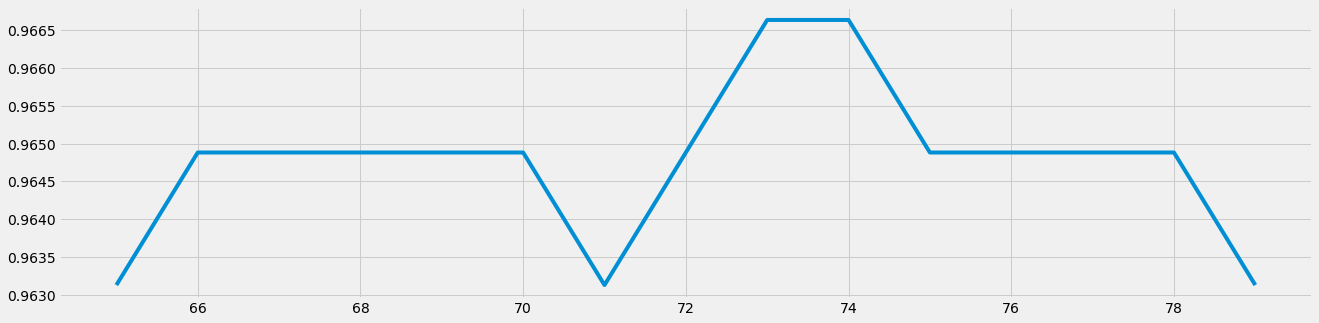

In [18]:
scorel = []
for i in range(65,80):
    rfc = RandomForestClassifier(n_estimators=i
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(65,80)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,80),scorel)
plt.show()

In [32]:
rfc = RandomForestClassifier(n_estimators=100) #实例化
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9560776942355889

In [14]:
random_forest = RandomForestClassifier(n_estimators=73) #实例化
random_forest.fit(Xtrain, Ytrain)
Y_pred = random_forest.predict(Xtest)
print(random_forest.score(Xtrain, Ytrain))
print(random_forest.score(Xtest, Ytest))
acc_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
cross_random_forest = cross_val_score(random_forest,X,y,cv=10).mean()
print(acc_random_forest)
print(cross_random_forest)

1.0
0.935672514619883
93.57
0.9666666666666668


## KNN

In [16]:
from sklearn.preprocessing import MinMaxScaler
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(data.data)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data.data)                     #通过接口导出结果
result

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [17]:
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(result,data.target,test_size=0.3)
print(Xtrain2.shape)
print(Ytrain2.shape)

(398, 30)
(398,)


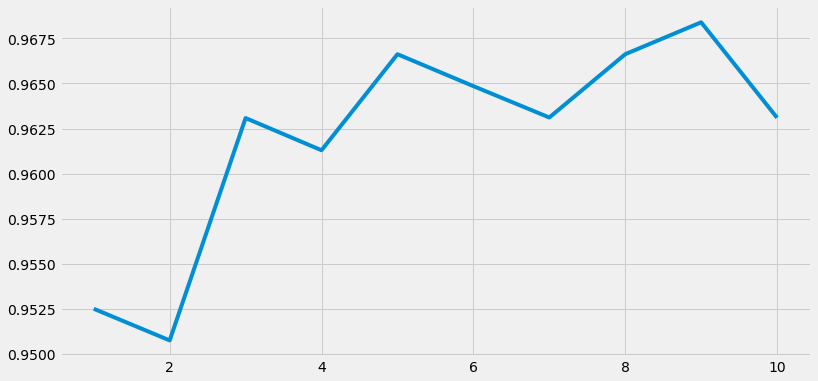

In [39]:
score=[]

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,result,data.target,cv=5)   #交叉验证
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)  # *range 激活成列表
fig = plt.gcf()
fig.set_size_inches(12,6)

In [18]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(Xtrain2, Ytrain2)
Y_pred = knn.predict(Xtest2)
print(knn.score(Xtest2, Ytest2))
acc_knn = round(knn.score(Xtest2, Ytest2) * 100, 2)
cross_knn = cross_val_score(knn,result,y,cv=10).mean()
print(acc_knn)
print(cross_knn)

0.9649122807017544
96.49
0.9666353383458647


## 朴素贝叶斯

In [19]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
Y_pred = gaussian.predict(Xtest)
print(gaussian.score(Xtrain, Ytrain))
print(gaussian.score(Xtest, Ytest))
acc_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
cross_gaussian = cross_val_score(gaussian,X,y,cv=10).mean()
print(acc_gaussian)
print(cross_gaussian)

0.949748743718593
0.9122807017543859
91.23
0.9367794486215537


## 逻辑回归

In [20]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
logreg.fit(Xtrain, Ytrain)
Y_pred = logreg.predict(Xtest)
print(logreg.score(Xtrain, Ytrain))
print(logreg.score(Xtest, Ytest))
acc_log = round(logreg.score(Xtest, Ytest) * 100, 2)
cross_log = cross_val_score(logreg,X,y,cv=10).mean()
print(acc_log)
print(cross_log) 

0.9597989949748744
0.9473684210526315
94.74
0.9490601503759398


## SVM

In [54]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [55]:
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #获取模型的预测结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.947368, recall is 0.950495', auc is 0.988260
00:00:896195
poly 's testing accuracy 0.923977, recall is 0.940594', auc is 0.984583
00:00:914119
rbf 's testing accuracy 0.590643, recall is 1.000000', auc is 0.908345
00:00:958030
sigmoid 's testing accuracy 0.590643, recall is 1.000000', auc is 0.500000
00:00:969002


In [21]:
clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ).fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
acc_svm = round(score * 100, 2)
cross_svm = cross_val_score(clf,X,y,cv=10).mean()
print(acc_svm)
print(cross_svm)

94.15
0.9543233082706767


In [22]:
models = pd.DataFrame({
    'Model': [ 'KNN','Logistic Regression','GaussianNB',
              'Random Forest','Decision Tree','SVM'],
    'Score': [acc_knn,acc_log,acc_gaussian,
              acc_random_forest,acc_decision_tree,acc_svm]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,96.49
1,Logistic Regression,94.74
5,SVM,94.15
3,Random Forest,93.57
4,Decision Tree,91.81
2,GaussianNB,91.23
